# Chapeter 5.2. Analysis of Labels of First Editions

# 5.2.0. Getting Basic Data

In [1]:
import sys
import os
import glob
sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from reading_robot import load_data, describe_data, get_metadata, classify, text2features, st_tests, process_labels
import pandas as pd
import re
import numpy as np
import scipy.stats as stats

In [2]:
wdir = "/home/jose/Dropbox/Doktorarbeit/ne_data/"
outdir = "/home/jose/Dropbox/Doktorarbeit/ne_data/chap5_2/"

In [3]:
reference_labels_df = pd.read_csv("/home/jose/Dropbox/Doktorarbeit/reading_robot/data/tokens-labels_semantic-labels.csv", sep="\t",index_col=False)
reference_labels_df.shape

(276, 4)

In [4]:
reference_labels_df.head(3)

,label,lexical_label_reference,semantic_label_reference,thema_code
0,almacenamiento de datos externo,almacenamiento,almacenamiento,-
1,novela americana,americana,americana,-
2,del caribe y américa latina,hispanoamericana,americana,-


In [5]:
sources_genre = ['subgenre.cligs', 'genre.subtitle', 'subgenre.lithist.MdLE', 'subgenre.lithist.HdLE', 'subgenre.edit.epublibre', 'subgenre.edit.amazon', 'subgenre.edit.wikidata', 'subgenre.edit.esdbpedia', 'subgenre.subtitle.bne','subgenre.subtitle.first.edition']

In [6]:
#get_metadata.from_TEIP5("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/", "master/*.xml","metadata", mode="beta-opt-obl-structure")

In [7]:
from shutil import copyfile
copyfile("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/metadata_beta-opt-obl-structure.csv", "/home/jose/Dropbox/Doktorarbeit/ne_data/metadata_beta-opt-obl-structure.csv")
copyfile("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/metadata_quantified-subgenres.csv", "/home/jose/Dropbox/Doktorarbeit/ne_data/metadata_quantified-subgenres.csv")

'/home/jose/Dropbox/Doktorarbeit/ne_data/metadata_quantified-subgenres.csv'

In [8]:
original_metadata_df = load_data.load_metadata(wdir ="/home/jose/Dropbox/Doktorarbeit/ne_data/", metadata_table = "metadata_beta-opt-obl-structure.csv", sep = ",").fillna("")
original_metadata_df.shape

metadata and class shape: 	 (358, 174)


(358, 174)

In [9]:
metadata_df = process_labels.delete_specific_label(original_metadata_df[sources_genre], "novela")

In [10]:
metadata_df  = metadata_df[sources_genre]

In [11]:
metadata_df.head()

,subgenre.cligs,genre.subtitle,subgenre.lithist.MdLE,subgenre.lithist.HdLE,subgenre.edit.epublibre,subgenre.edit.amazon,subgenre.edit.wikidata,subgenre.edit.esdbpedia,subgenre.subtitle.bne,subgenre.subtitle.first.edition
ne0001,"naturalist,sentimental,social,realist",,,,"Aventuras, Drama",Ficción contemporánea; Ficción clásica; Litera...,,,,
ne0002,"naturalist,social,realist",,novela de tesis,,Realista,"Ficción clásica, Bibliotecas, Libros escolares...",,,,
ne0003,"naturalist,social,spiritual,realist",,novela espiritualista,,Drama,"Ficción, Europea, Antologías; Ficción clásica;...",,,,
ne0004,"sentimental,social,spiritual,realist",,novela espiritual,,"Drama, Realista","Siglo XIX, Antigua y clásica; Ficción clásica;...",,,,
ne0005,"naturalist,realist,sentimental,social,spiritua...",,novela espiritual,,Realista,"Ficción clásica, Ficción contemporánea; Ficció...",,realismo,,


In [12]:
metadata_df["subgenre.subtitle.first.edition"]

ne0001                                         
ne0002                                         
ne0003                                         
ne0004                                         
ne0005                                         
ne0006                                         
ne0007                                         
ne0008                                         
ne0009                                         
ne0010                                         
ne0011                                         
ne0013                                  memoria
ne0014                                  memoria
ne0015                                  memoria
ne0016                                  memoria
ne0017                                 historia
ne0018                                         
ne0019                                         
ne0020                                         
ne0021                                         
ne0022                                  

In [13]:
semantic_labels_df = process_labels.modelize_metadata_labels(metadata_df[sources_genre], outdir, reference_labels_df, reference_column = "semantic_label_reference")
semantic_labels_df.shape

(358, 10)

In [14]:
semantic_labels_df["subgenre.subtitle.first.edition"].sample(10)

ne0303            
ne0331            
ne0208            
ne0015    memorias
ne0077            
ne0109            
ne0253            
ne0019            
ne0164            
ne0373            
Name: subgenre.subtitle.first.edition, dtype: object

# 5.2.1. Description and Comparison of the Labels of the Covers

Amount of token-labels in the first cover

In [15]:
original_metadata_df.loc[original_metadata_df["subgenre.subtitle.first.edition"] !=""]["subgenre.subtitle.first.edition"].shape

(131,)

Amount of semantic-labels in the first cover

In [16]:
semantic_labels_df.loc[semantic_labels_df["subgenre.subtitle.first.edition"] !=""].shape

(79, 10)

In [17]:
79/385


0.2051948051948052

In [18]:
original_metadata_df["subgenre.subtitle.first.edition"]

ne0001                                         
ne0002                                         
ne0003                                         
ne0004                                         
ne0005                                         
ne0006                                         
ne0007                                         
ne0008                                         
ne0009                                         
ne0010                                   novela
ne0011                                         
ne0013                                  memoria
ne0014                                  memoria
ne0015                                  memoria
ne0016                                  memoria
ne0017                                 historia
ne0018                                         
ne0019                                   novela
ne0020                                         
ne0021                                         
ne0022                                  

In [19]:
list_labels_tokens_lt = sorted(list(set(process_labels.get_list_labels(outdir, original_metadata_df[["subgenre.subtitle.first.edition"]], print_=True))))


In [20]:
len(list_labels_tokens_lt)

43

In [21]:
list_labels_tokens_lt

['apuntes',
 'biografía',
 'cancionero',
 'comedia',
 'cuadro',
 'cuento',
 'diario',
 'diálogo',
 'ensayo de novela',
 'episodio nacional',
 'epopeya',
 'escenas',
 'etopeya',
 'figuras',
 'fábula',
 'greguería',
 'historia',
 'leyenda',
 'libro',
 'memoria',
 'memorias',
 'narración',
 'nivola',
 'novela',
 'novela andaluza',
 'novela casi cosmopolita',
 'novela casi divina',
 'novela de amor',
 'novela de costumbres',
 'novela de costumbres campesinas',
 'novela de costumbres marítimas',
 'novela de la guerra',
 'novela de la revolución',
 'novela de sarcasmo social y cristiano',
 'novela en cinco jornadas',
 'novela grande',
 'novela humorística',
 'novela póstuma',
 'novela sin pensamiento trascendental',
 'poema',
 'recuerdos',
 'relación contemporánea',
 'sentencias']

In [22]:
list_labels_lt = sorted(list(set(process_labels.get_list_labels(outdir, semantic_labels_df[['subgenre.subtitle.first.edition']], print_=True))))
len(list_labels_lt) 


32

In [2]:
32/79

0.4050632911392405

Extracting each label and making it binary

In [24]:
metadata_labels_quantified_first_edition_df = process_labels.count_labels_from_sources(list_labels_lt, semantic_labels_df, ["subgenre.subtitle.first.edition"], outdir)
metadata_labels_quantified_first_edition_df = (metadata_labels_quantified_first_edition_df > 0).astype(int)

subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition bi

subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition biografía
subgenre.subtitle.first.edition borrador
subgenre.subtitle.first.edition borrador
subgenre.subtitle.first.edition borrador
subgenre.subtitle.first.edition borrador
subgenre.subtitle.first.edition borrador
subgenre.subtitle.first.edition borrador
subgenre.subtitle.first.edition borrador
subgenre.subtitle.first.edition borrador
subgenre.subtitle.first.edition borrador
s

subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.edition ciudad
subgenre.subtitle.first.e

subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.subtitle.first.edition costumbrista
subgenre.s

subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.edition cuadro
subgenre.subtitle.first.e

subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.edition diario
subgenre.subtitle.first.e

subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo
subgenre.subtitle.first.edition diálogo


subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya
subgenre.subtitle.first.edition epopeya


subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.edition escena
subgenre.subtitle.first.e

subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition espiritual
subgenre.subtitle.first.edition etopeya
subgenre.subtitle.first.edition etopeya
subgenre.subtitle.first.edition etopeya
subgenre.subtitle.first.edition etopeya
subgenre.subtitle.first.edition etopeya
subgenre.subtitle.first.edition etopeya
subgenre.subtitle.first.editi

subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.edition fábula
subgenre.subtitle.first.e

subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition greguería
subgenre.subtitle.first.edition gr

subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitle.first.edition historia
subgenre.subtitl

subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.subtitle.first.edition humor
subgenre.sub

subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda
subgenre.subtitle.first.edition leyenda


subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitle.first.edition memorias
subgenre.subtitl

subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la revolución
subgenre.subtitle.first.edition novela de la rev

subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition novela en cinco jornadas
subgenre.subtitle.first.edition

subgenre.subtitle.first.edition novela sin pensamiento trascendental
subgenre.subtitle.first.edition novela sin pensamiento trascendental
subgenre.subtitle.first.edition novela sin pensamiento trascendental
subgenre.subtitle.first.edition novela sin pensamiento trascendental
subgenre.subtitle.first.edition novela sin pensamiento trascendental
subgenre.subtitle.first.edition novela sin pensamiento trascendental
subgenre.subtitle.first.edition novela sin pensamiento trascendental
subgenre.subtitle.first.edition novela sin pensamiento trascendental
subgenre.subtitle.first.edition novela sin pensamiento trascendental
subgenre.subtitle.first.edition novela sin pensamiento trascendental
subgenre.subtitle.first.edition novela sin pensamiento trascendental
subgenre.subtitle.first.edition novela sin pensamiento trascendental
subgenre.subtitle.first.edition novela sin pensamiento trascendental
subgenre.subtitle.first.edition novela sin pensamiento trascendental
subgenre.subtitle.first.edition no

subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.subtitle.first.edition prosa
subgenre.sub

subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma
subgenre.subtitle.first.edition póstuma


subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitle.first.edition realista
subgenre.subtitl

subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition romántica
subgenre.subtitle.first.edition ro

subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.subtitle.first.edition sentencias
subgenre.su

Amount of sources marking a text with the different labels

In [25]:
dict(metadata_labels_quantified_first_edition_df.sum()[metadata_labels_quantified_first_edition_df.sum()>1].sort_values(ascending=False))

{'borrador': 3,
 'costumbrista': 8,
 'cuento': 2,
 'episodio nacional': 9,
 'escena': 4,
 'greguería': 2,
 'historia': 10,
 'humor': 3,
 'larga': 3,
 'leyenda': 2,
 'memorias': 11,
 'poética': 2,
 'prosa': 2,
 'regionalista': 2}

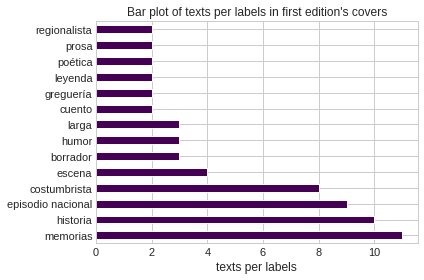

In [26]:
describe_data.simple_bars(metadata_labels_quantified_first_edition_df.sum()[metadata_labels_quantified_first_edition_df.sum()>1].sort_values(ascending=False), "texts per labels", outdir,"first edition's covers")

# 5.2.2. Classification Results Comparing First Publication Labels with other Sources

Getting labels and features to classify them

In [51]:
metadata_labels_quantified_first_edition_df.head()

,biografía,borrador,ciudad,costumbrista,cuadro,cuento,diario,diálogo,episodio nacional,epopeya,...,novela en cinco jornadas,novela sin pensamiento trascendental,poética,prosa,póstuma,realista,regionalista,romántica,sentencias,sátira
ne0001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ne0002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ne0003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ne0004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ne0005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
metadata_quantified_subgenres_df = pd.read_csv(wdir+"metadata_quantified-subgenres.csv",sep="\t",index_col=0)

In [79]:
metadata_quantified_subgenres_df.head()

,idno,author.name,title,year,supergenre,genre,subgenre.cligs.important,author.country,author.viaf,author.bne,...,costumbrista,social,espiritual,realista,autobiografía,psicológica,modernista,biografía,educación,filosófica
ne0001,ne0001,Baroja,Mayorazgo,1903,narrative,novela,realist,Spain,36912891.0,XX842743,...,0,1,0,1,0,0,0,0,0,0
ne0002,ne0002,Galdos,Misericordia,1889,narrative,novela,realist,Spain,71395987.0,XX1014802,...,0,1,0,2,0,0,0,0,0,0
ne0003,ne0003,Galdos,Nazarin,1895,narrative,novela,realist,Spain,71395987.0,XX1014802,...,0,1,2,1,0,0,0,0,0,0
ne0004,ne0004,Galdos,Halma,1895,narrative,novela,realist,Spain,71395987.0,XX1014802,...,0,1,2,2,0,0,0,0,0,0
ne0005,ne0005,Galdos,Tristana,1892,narrative,novela,bildungsroman,Spain,71395987.0,XX1014802,...,0,1,2,3,0,0,0,0,1,0


In [80]:
subgenres_lt = sorted(['guerra', 'diálogo', 'histórica', 'humor', 'aventura', 'nivola', 'poética', 'memorias', 'naturalista', 'erótica', 'greguería', 'fantástico', 'episodio nacional', 'costumbrista', 'social', 'espiritual', 'realista', 'autobiografía', 'psicológica', 'modernista', 'biografía', 'educación', 'filosófica'])
metadata_quantified_subgenres_df = metadata_quantified_subgenres_df[subgenres_lt]

metadata_quantified_subgenres_df = (metadata_quantified_subgenres_df > 0).astype(int)


In [90]:
metadata_quantified_subgenres_df.head()

,autobiografía,aventura,biografía,costumbrista,diálogo,educación,episodio nacional,erótica,espiritual,fantástico,...,histórica,humor,memorias,modernista,naturalista,nivola,poética,psicológica,realista,social
ne0001,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
ne0002,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,1
ne0003,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
ne0004,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
ne0005,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1


In [81]:
from shutil import copyfile
copyfile("/home/jose/Dropbox/Doktorarbeit/ne_data/chap6_1/exp_corpora/tags_ling_pos_diff_mw_ord_ent_70000_T.parquet", outdir+"tags_ling_pos_diff_mw_ord_ent_70000_T.parquet")

'/home/jose/Dropbox/Doktorarbeit/ne_data/chap5_2_1/tags_ling_pos_diff_mw_ord_ent_70000_T.parquet'

In [92]:
tags_ling_pos_diff_mw_ord_ent_corpus_df = pd.read_parquet(outdir+"tags_ling_pos_diff_mw_ord_ent_70000_T.parquet").T

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [96]:
tags_ling_pos_diff_mw_ord_ent_corpus_df.head()

,",@form_punctuation@pos",am.divs,1@person,am.verses,de@form_adposition@pos,am.sps,2@person,am.paragraphs,.@form_punctuation@pos,am.pds,...,formalizó@form_verb@pos,volvime@form_adjective@pos,pegadito@form_verb@pos,lavarán@form_verb@pos,abrumo@form_verb@pos,cestillos@form_noun@pos,glicina@form_noun@pos,patriarcalmente@form_adverb@pos,impeler@form_verb@pos,fumadora@form_noun@pos
ne0001,3448,41,1001,71,2797,0,678,2354,2801,1242,...,0,0,0,0,0,0,0,0,0,0
ne0002,8003,42,2935,0,4435,0,1713,1498,3105,1104,...,0,0,0,0,0,0,0,0,0,0
ne0003,6493,41,2875,0,3192,0,1305,1160,2552,851,...,0,0,0,0,0,0,0,0,0,0
ne0004,7411,45,3540,0,3753,0,1642,1272,3099,978,...,0,0,0,0,0,0,0,0,0,0
ne0005,4827,30,2870,0,2839,0,1461,556,2172,299,...,0,0,0,0,0,0,0,0,0,0


In [98]:
rel_tags_ling_pos_diff_mw_ord_ent_corpus_df = tags_ling_pos_diff_mw_ord_ent_corpus_df.divide(original_metadata_df["am.tokens"],axis=0)

Classification of the data from the first cover

In [86]:
results_first_edition_df = classify.classify(wdir = outdir, freq_table  = rel_tags_ling_pos_diff_mw_ord_ent_corpus_df,
                            metadata = metadata_labels_quantified_first_edition_df,
              classes = list_labels_lt, verbose = True,
              methods = ["LR"],#, 
              max_MFFs = [2000,3000,5000,7000],  minimal_value_samples = 3,
              text_representations = ["log10","log"],
              typographies = [True], sampling_mode = "cross", make_relative = False, 
                            under_sample_method = "lpc", sampling_times = 10, outdir_results = outdir)


cut_raw_features          ,@form_punctuation@pos   am.divs  1@person  am.verses  \
ne0001                0.064356  0.000765  0.018683   0.001325   
ne0002                0.095511  0.000501  0.035028   0.000000   
ne0003                0.100304  0.000633  0.044413   0.000000   
ne0004                0.101035  0.000613  0.048261   0.000000   
ne0005                0.091833  0.000571  0.054601   0.000000   

        de@form_adposition@pos  am.sps  2@person  am.paragraphs  \
ne0001                0.052205     0.0  0.012655       0.043937   
ne0002                0.052929     0.0  0.020444       0.017878   
ne0003                0.049310     0.0  0.020160       0.017920   
ne0004                0.051165     0.0  0.022386       0.017341   
ne0005                0.054011     0.0  0.027795       0.010578   

        .@form_punctuation@pos    am.pds           ...            \
ne0001                0.052280  0.023182           ...             
ne0002                0.037056  0.013176           .

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(357, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['piso@form_noun@pos', 'dije@form_verb@pos', 'cuanto@form_adverb@pos']
After culling the class biografía  can't be divided in two groups. This category is going to be ignored
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['perdón@form_noun@pos', 'acostar@form_verb@pos', 'despacio@form_adverb@pos']
After culling the class biografía  can't be divided in two groups. This category is going to be ignored
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['rompiendo@form_verb@pos', 'manifestar@form_verb@pos', 'encontraban@form_verb@pos']
After culling the class biografía  can't be divided in two groups. This category is going to be ignored
MFW 7000
The three first MFWs:  [',@form_punc

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(357, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['piso@form_noun@pos', 'dije@form_verb@pos', 'cuanto@form_adverb@pos']
After culling the class biografía  can't be divided in two groups. This category is going to be ignored
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['perdón@form_noun@pos', 'acostar@form_verb@pos', 'despacio@form_adverb@pos']
After culling the class biografía  can't be divided in two groups. This category is going to be ignored
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['rompiendo@form_verb@pos', 'manifestar@form_verb@pos', 'encontraban@form_verb@pos']
After culling the class biografía  can't be divided in two groups. This category is going to be ignored
MFW 7000


KeyboardInterrupt: 

In [57]:
results_first_edition_df.to_csv(outdir+"results_first_edition.csv",sep="\t")

In [15]:
results_first_edition_df = pd.read_csv(outdir+"results_first_edition.csv",sep="\t",index_col=0)

In [16]:
results_first_edition_df.groupby(["class"]).head(1)

,class,mean_f1,mean_rec,mean_prec,baseline,f1-baseline,classifier_name,text_representation,MFW,typography,f1s,test_result_pvalue,labels,sample_size,cv,sampling_times,classifier
52,larga,1.000,1.000,1.000,0.5,0.500,LR,log,2000,True,[1. 1. 0.67 1. 0.67 1. 1. 1. 1. ...,4.508141e-18,ne0120 0\nne0171 1\nne0008 0\nne0167 ...,6,3,10,"LogisticRegression(C=1.0, class_weight=None, d..."
21,episodio nacional,1.000,1.000,1.000,0.5,0.500,LR,log,3000,True,[1. 1. 1. 1. 1. 1. 1. 1. 1. ...,9.691162e-78,ne0281 1\nne0209 0\nne0305 0\nne0342 ...,18,9,10,"LogisticRegression(C=1.0, class_weight=None, d..."
9,costumbrista,1.000,1.000,1.000,0.5,0.500,LR,log10,3000,True,[1. 1. 1. 0.67 1. 1. 1. 1. 1. ...,1.192230e-57,ne0230 1\nne0251 0\nne0157 0\nne0304 ...,16,8,10,"LogisticRegression(C=1.0, class_weight=None, d..."
34,historia,0.867,0.900,0.850,0.5,0.367,LR,log10,5000,True,[0. 1. 1. 1. 0. 0.67 0. 0. 1. ...,3.193421e-03,ne0321 1\nne0198 1\nne0246 0\nne0136 ...,20,10,10,"LogisticRegression(C=1.0, class_weight=None, d..."
57,memorias,0.833,0.850,0.850,0.5,0.333,LR,log10,3000,True,[1. 0.67 1. 1. 0. 0.67 0. 1. 1. ...,9.859816e-10,ne0039 1\nne0133 0\nne0016 1\nne0014 ...,22,10,10,"LogisticRegression(C=1.0, class_weight=None, d..."
29,escena,0.750,0.750,0.750,0.5,0.250,LR,log,3000,True,[0. 1. 1. 0. 1. 0. 0.67 0. 1. ...,8.262979e-01,ne0055 1\nne0041 1\nne0054 1\nne0143 ...,8,4,10,"LogisticRegression(C=1.0, class_weight=None, d..."
42,humor,0.667,0.750,0.625,0.5,0.167,LR,log10,5000,True,[0.67 0. 0. 0.67 1. 1. 0. 1. 1. ...,5.466936e-02,ne0378 1\nne0116 0\nne0016 1\nne0345 ...,8,4,10,"LogisticRegression(C=1.0, class_weight=None, d..."
6,borrador,0.333,0.333,0.333,0.5,-0.167,LR,log,5000,True,[0. 0.67 0.67 0. 0.67 0.67 0. 0. 0. ...,1.654170e-04,ne0241 0\nne0040 1\nne0308 0\nne0177 ...,6,3,10,"LogisticRegression(C=1.0, class_weight=None, d..."


In [17]:
results_first_edition_df["mean_f1"].mean()

0.652046875

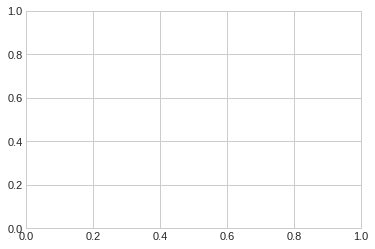

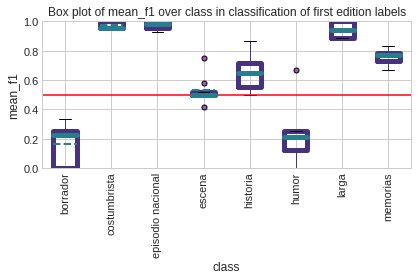

In [85]:
describe_data.boxplots(results_first_edition_df, "mean_f1", "class", outdir, "classification of first edition labels", rotation = 90, figsize=[7,5],baseline=0.5,)

Classification of the data from all the sources

In [100]:
results_non_bne_text_df = classify.classify(wdir = outdir, freq_table  = rel_tags_ling_pos_diff_mw_ord_ent_corpus_df,
                            metadata = metadata_quantified_subgenres_df,
              classes = subgenres_lt, verbose = True,
              methods = ["LR"],#, 
              max_MFFs = [2000,3000,5000,7000],  minimal_value_samples = 3,
              text_representations = ["log10","log"],
              typographies = [True], sampling_mode = "cross", make_relative = False, 
                            under_sample_method = "lpc", sampling_times = 10, outdir_results = outdir)


cut_raw_features          ,@form_punctuation@pos   am.divs  1@person  am.verses  \
ne0001                0.064356  0.000765  0.018683   0.001325   
ne0002                0.095511  0.000501  0.035028   0.000000   
ne0003                0.100304  0.000633  0.044413   0.000000   
ne0004                0.101035  0.000613  0.048261   0.000000   
ne0005                0.091833  0.000571  0.054601   0.000000   

        de@form_adposition@pos  am.sps  2@person  am.paragraphs  \
ne0001                0.052205     0.0  0.012655       0.043937   
ne0002                0.052929     0.0  0.020444       0.017878   
ne0003                0.049310     0.0  0.020160       0.017920   
ne0004                0.051165     0.0  0.022386       0.017341   
ne0005                0.054011     0.0  0.027795       0.010578   

        .@form_punctuation@pos    am.pds           ...            \
ne0001                0.052280  0.023182           ...             
ne0002                0.037056  0.013176           .

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (58,) (58, 2000) lpc
cross validation sampling of  autobiografía


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


(358,)
(358, 2000)
undersampling lpc
undersampled (58,) (58, 2000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 2000)
undersampling lpc
undersampled (58,) (58, 2000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 2000)
undersampling lpc
undersampled (58,) (58, 2000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 2000)
undersampling lpc
undersampled (58,) (58, 2000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 2000)
undersampling lpc
undersampled (58,) (58, 2000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 2000)
undersampling lpc
undersampled (58,) (58, 2000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 2000)
undersampling lpc
undersampled (58,) (58, 2000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 2000)
undersampling lpc
undersampled (58,) (58, 2000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 2000)
undersampling lpc
undersampled (58,) (58, 2000) lpc
cross val

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (58,) (58, 2000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 2000)
undersampling lpc
undersampled (58,) (58, 2000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 2000)
undersampling lpc
undersampled (58,) (58, 2000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 2000)
undersampling lpc
undersampled (58,) (58, 2000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 2000)
undersampling lpc
undersampled (58,) (58, 2000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 2000)
undersampling lpc
undersampled (58,) (58, 2000) lpc
cross validation sampling of  autobiografía
(358,)
(358, 2000)
undersampling lpc
undersampled (58,

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (98,) (98, 2000) lpc
cross validation sampling of  aventura
(358,)
(358, 2000)
undersampling lpc
undersampled (98,) (98, 2000) lpc
cross validation sampling of  aventura
(358,)
(358, 2000)
undersampling lpc
undersampled (98,) (98, 2000) lpc
cross validation sampling of  aventura
(358,)
(358, 2000)
undersampling lpc
undersampled (98,) (98, 2000) lpc
cross validation sampling of  aventura
(358,)
(358, 2000)
undersampling lpc
undersampled (98,) (98, 2000) lpc
cross validation sampling of  aventura
(358,)
(358, 2000)
undersampling lpc
undersampled (98,) (98, 2000) lpc
cross validation sampling of  aventura
(358,)
(358, 2000)
undersampling lpc
undersampled (98,) (98, 2000) lpc
cross valid

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (98,) (98, 2000) lpc
cross validation sampling of  aventura
(358,)
(358, 2000)
undersampling lpc
undersampled (98,) (98, 2000) lpc
cross validation sampling of  aventura
(358,)
(358, 2000)
undersampling lpc
undersampled (98,) (98, 2000) lpc
cross validation sampling of  aventura
(358,)
(358, 2000)
undersampling lpc
undersampled (98,) (98, 2000) lpc
cross validation sampling of  aventura
(358,)
(358, 2000)
undersampling lpc
undersampled (98,) (98, 2000) lpc
cross validation sampling of  aventura
(358,)
(358, 2000)
undersampling lpc
undersampled (98,) (98, 2000) lpc
cross validation sampling of  aventura
(358,)
(358, 2000)
undersampling lpc
undersampled (98,) (98, 2000) lpc
cross validat

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (66,) (66, 2000) lpc
cross validation sampling of  biografía
(358,)
(358, 2000)
undersampling lpc
undersampled (66,) (66, 2000) lpc
cross validation sampling of  biografía
(358,)
(358, 2000)
undersampling lpc
undersampled (66,) (66, 2000) lpc
cross validation sampling of  biografía
(358,)
(358, 2000)
undersampling lpc
undersampled (66,) (66, 2000) lpc
cross validation sampling of  biografía
(358,)
(358, 2000)
undersampling lpc
undersampled (66,) (66, 2000) lpc
cross validation sampling of  biografía
(358,)
(358, 2000)
undersampling lpc
undersampled (66,) (66, 2000) lpc
cross validation sampling of  biografía
(358,)
(358, 2000)
undersampling lpc
undersampled (66,) (66, 2000) lpc
cross

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (66,) (66, 2000) lpc
cross validation sampling of  biografía
(358,)
(358, 2000)
undersampling lpc
undersampled (66,) (66, 2000) lpc
cross validation sampling of  biografía
(358,)
(358, 2000)
undersampling lpc
undersampled (66,) (66, 2000) lpc
cross validation sampling of  biografía
(358,)
(358, 2000)
undersampling lpc
undersampled (66,) (66, 2000) lpc
cross validation sampling of  biografía
(358,)
(358, 2000)
undersampling lpc
undersampled (66,) (66, 2000) lpc
cross validation sampling of  biografía
(358,)
(358, 2000)
undersampling lpc
undersampled (66,) (66, 2000) lpc
cross validation sampling of  biografía
(358,)
(358, 2000)
undersampling lpc
undersampled (66,) (66, 2000) lpc
cross v

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (32,) (32, 2000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 2000)
undersampling lpc
undersampled (32,) (32, 2000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 2000)
undersampling lpc
undersampled (32,) (32, 2000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 2000)
undersampling lpc
undersampled (32,) (32, 2000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 2000)
undersampling lpc
undersampled (32,) (32, 2000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 2000)
undersampling lpc
undersampled (32,) (32, 2000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 2000)
undersampling lpc
undersampled (32,) (3

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (32,) (32, 2000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 2000)
undersampling lpc
undersampled (32,) (32, 2000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 2000)
undersampling lpc
undersampled (32,) (32, 2000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 2000)
undersampling lpc
undersampled (32,) (32, 2000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 2000)
undersampling lpc
undersampled (32,) (32, 2000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 2000)
undersampling lpc
undersampled (32,) (32, 2000) lpc
cross validation sampling of  costumbrista
(358,)
(358, 2000)
undersampling lpc
undersampled (32,) (32,

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (18,) (18, 2000) lpc
cross validation sampling of  diálogo
(358,)
(358, 2000)
undersampling lpc
undersampled (18,) (18, 2000) lpc
cross validation sampling of  diálogo
(358,)
(358, 2000)
undersampling lpc
undersampled (18,) (18, 2000) lpc
cross validation sampling of  diálogo
(358,)
(358, 2000)
undersampling lpc
undersampled (18,) (18, 2000) lpc
cross validation sampling of  diálogo
(358,)
(358, 2000)
undersampling lpc
undersampled (18,) (18, 2000) lpc
cross validation sampling of  diálogo
(358,)
(358, 2000)
undersampling lpc
undersampled (18,) (18, 2000) lpc
cross validation sampling of  diálogo
(358,)
(358, 2000)
undersampling lpc
undersampled (18,) (18, 2000) lpc
cross validation 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (18,) (18, 2000) lpc
cross validation sampling of  diálogo
(358,)
(358, 2000)
undersampling lpc
undersampled (18,) (18, 2000) lpc
cross validation sampling of  diálogo
(358,)
(358, 2000)
undersampling lpc
undersampled (18,) (18, 2000) lpc
cross validation sampling of  diálogo
(358,)
(358, 2000)
undersampling lpc
undersampled (18,) (18, 2000) lpc
cross validation sampling of  diálogo
(358,)
(358, 2000)
undersampling lpc
undersampled (18,) (18, 2000) lpc
cross validation sampling of  diálogo
(358,)
(358, 2000)
undersampling lpc
undersampled (18,) (18, 2000) lpc
cross validation sampling of  diálogo
(358,)
(358, 2000)
undersampling lpc
undersampled (18,) (18, 2000) lpc
cross validation sa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (142,) (142, 2000) lpc
cross validation sampling of  educación
(358,)
(358, 2000)
undersampling lpc
undersampled (142,) (142, 2000) lpc
cross validation sampling of  educación
(358,)
(358, 2000)
undersampling lpc
undersampled (142,) (142, 2000) lpc
cross validation sampling of  educación
(358,)
(358, 2000)
undersampling lpc
undersampled (142,) (142, 2000) lpc
cross validation sampling of  educación
(358,)
(358, 2000)
undersampling lpc
undersampled (142,) (142, 2000) lpc
cross validation sampling of  educación
(358,)
(358, 2000)
undersampling lpc
undersampled (142,) (142, 2000) lpc
cross validation sampling of  educación
(358,)
(358, 2000)
undersampling lpc
undersampled (142,) (142, 2

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (142,) (142, 2000) lpc
cross validation sampling of  educación
(358,)
(358, 2000)
undersampling lpc
undersampled (142,) (142, 2000) lpc
cross validation sampling of  educación
(358,)
(358, 2000)
undersampling lpc
undersampled (142,) (142, 2000) lpc
cross validation sampling of  educación
(358,)
(358, 2000)
undersampling lpc
undersampled (142,) (142, 2000) lpc
cross validation sampling of  educación
(358,)
(358, 2000)
undersampling lpc
undersampled (142,) (142, 2000) lpc
cross validation sampling of  educación
(358,)
(358, 2000)
undersampling lpc
undersampled (142,) (142, 2000) lpc
cross validation sampling of  educación
(358,)
(358, 2000)
undersampling lpc
undersampled (142,) (142, 200

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (22,) (22, 2000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 2000)
undersampling lpc
undersampled (22,) (22, 2000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 2000)
undersampling lpc
undersampled (22,) (22, 2000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 2000)
undersampling lpc
undersampled (22,) (22, 2000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 2000)
undersampling lpc
undersampled (22,) (22, 2000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 2000)
undersampling lpc
undersampled (22,) (22, 2000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 2000)
undersamp

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (22,) (22, 2000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 2000)
undersampling lpc
undersampled (22,) (22, 2000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 2000)
undersampling lpc
undersampled (22,) (22, 2000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 2000)
undersampling lpc
undersampled (22,) (22, 2000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 2000)
undersampling lpc
undersampled (22,) (22, 2000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 2000)
undersampling lpc
undersampled (22,) (22, 2000) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 2000)
undersampli

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (34,) (34, 2000) lpc
cross validation sampling of  erótica
(358,)
(358, 2000)
undersampling lpc
undersampled (34,) (34, 2000) lpc
cross validation sampling of  erótica
(358,)
(358, 2000)
undersampling lpc
undersampled (34,) (34, 2000) lpc
cross validation sampling of  erótica
(358,)
(358, 2000)
undersampling lpc
undersampled (34,) (34, 2000) lpc
cross validation sampling of  erótica
(358,)
(358, 2000)
undersampling lpc
undersampled (34,) (34, 2000) lpc
cross validation sampling of  erótica
(358,)
(358, 2000)
undersampling lpc
undersampled (34,) (34, 2000) lpc
cross validation sampling of  erótica
(358,)
(358, 2000)
undersampling lpc
undersampled (34,) (34, 2000) lpc
cross validation 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (34,) (34, 2000) lpc
cross validation sampling of  erótica
(358,)
(358, 2000)
undersampling lpc
undersampled (34,) (34, 2000) lpc
cross validation sampling of  erótica
(358,)
(358, 2000)
undersampling lpc
undersampled (34,) (34, 2000) lpc
cross validation sampling of  erótica
(358,)
(358, 2000)
undersampling lpc
undersampled (34,) (34, 2000) lpc
cross validation sampling of  erótica
(358,)
(358, 2000)
undersampling lpc
undersampled (34,) (34, 2000) lpc
cross validation sampling of  erótica
(358,)
(358, 2000)
undersampling lpc
undersampled (34,) (34, 2000) lpc
cross validation sampling of  erótica
(358,)
(358, 2000)
undersampling lpc
undersampled (34,) (34, 2000) lpc
cross validation sa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (68,) (68, 2000) lpc
cross validation sampling of  espiritual
(358,)
(358, 2000)
undersampling lpc
undersampled (68,) (68, 2000) lpc
cross validation sampling of  espiritual
(358,)
(358, 2000)
undersampling lpc
undersampled (68,) (68, 2000) lpc
cross validation sampling of  espiritual
(358,)
(358, 2000)
undersampling lpc
undersampled (68,) (68, 2000) lpc
cross validation sampling of  espiritual
(358,)
(358, 2000)
undersampling lpc
undersampled (68,) (68, 2000) lpc
cross validation sampling of  espiritual
(358,)
(358, 2000)
undersampling lpc
undersampled (68,) (68, 2000) lpc
cross validation sampling of  espiritual
(358,)
(358, 2000)
undersampling lpc
undersampled (68,) (68, 2000) lpc

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (68,) (68, 2000) lpc
cross validation sampling of  espiritual
(358,)
(358, 2000)
undersampling lpc
undersampled (68,) (68, 2000) lpc
cross validation sampling of  espiritual
(358,)
(358, 2000)
undersampling lpc
undersampled (68,) (68, 2000) lpc
cross validation sampling of  espiritual
(358,)
(358, 2000)
undersampling lpc
undersampled (68,) (68, 2000) lpc
cross validation sampling of  espiritual
(358,)
(358, 2000)
undersampling lpc
undersampled (68,) (68, 2000) lpc
cross validation sampling of  espiritual
(358,)
(358, 2000)
undersampling lpc
undersampled (68,) (68, 2000) lpc
cross validation sampling of  espiritual
(358,)
(358, 2000)
undersampling lpc
undersampled (68,) (68, 2000) lpc
c

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (48,) (48, 2000) lpc
cross validation sampling of  fantástico
(358,)
(358, 2000)
undersampling lpc
undersampled (48,) (48, 2000) lpc
cross validation sampling of  fantástico
(358,)
(358, 2000)
undersampling lpc
undersampled (48,) (48, 2000) lpc
cross validation sampling of  fantástico
(358,)
(358, 2000)
undersampling lpc
undersampled (48,) (48, 2000) lpc
cross validation sampling of  fantástico
(358,)
(358, 2000)
undersampling lpc
undersampled (48,) (48, 2000) lpc
cross validation sampling of  fantástico
(358,)
(358, 2000)
undersampling lpc
undersampled (48,) (48, 2000) lpc
cross validation sampling of  fantástico
(358,)
(358, 2000)
undersampling lpc
undersampled (48,) (48, 2000) lpc

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (48,) (48, 2000) lpc
cross validation sampling of  fantástico
(358,)
(358, 2000)
undersampling lpc
undersampled (48,) (48, 2000) lpc
cross validation sampling of  fantástico
(358,)
(358, 2000)
undersampling lpc
undersampled (48,) (48, 2000) lpc
cross validation sampling of  fantástico
(358,)
(358, 2000)
undersampling lpc
undersampled (48,) (48, 2000) lpc
cross validation sampling of  fantástico
(358,)
(358, 2000)
undersampling lpc
undersampled (48,) (48, 2000) lpc
cross validation sampling of  fantástico
(358,)
(358, 2000)
undersampling lpc
undersampled (48,) (48, 2000) lpc
cross validation sampling of  fantástico
(358,)
(358, 2000)
undersampling lpc
undersampled (48,) (48, 2000) lpc
c

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (184,) (184, 2000) lpc
cross validation sampling of  filosófica
(358,)
(358, 2000)
undersampling lpc
undersampled (184,) (184, 2000) lpc
cross validation sampling of  filosófica
(358,)
(358, 2000)
undersampling lpc
undersampled (184,) (184, 2000) lpc
cross validation sampling of  filosófica
(358,)
(358, 2000)
undersampling lpc
undersampled (184,) (184, 2000) lpc
cross validation sampling of  filosófica
(358,)
(358, 2000)
undersampling lpc
undersampled (184,) (184, 2000) lpc
cross validation sampling of  filosófica
(358,)
(358, 2000)
undersampling lpc
undersampled (184,) (184, 2000) lpc
cross validation sampling of  filosófica
(358,)
(358, 2000)
undersampling lpc
undersampled (184,) (

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (184,) (184, 2000) lpc
cross validation sampling of  filosófica
(358,)
(358, 2000)
undersampling lpc
undersampled (184,) (184, 2000) lpc
cross validation sampling of  filosófica
(358,)
(358, 2000)
undersampling lpc
undersampled (184,) (184, 2000) lpc
cross validation sampling of  filosófica
(358,)
(358, 2000)
undersampling lpc
undersampled (184,) (184, 2000) lpc
cross validation sampling of  filosófica
(358,)
(358, 2000)
undersampling lpc
undersampled (184,) (184, 2000) lpc
cross validation sampling of  filosófica
(358,)
(358, 2000)
undersampling lpc
undersampled (184,) (184, 2000) lpc
cross validation sampling of  filosófica
(358,)
(358, 2000)
undersampling lpc
undersampled (184,) (18

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(356, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['cuanto@form_adverb@pos', 'solía@form_verb@pos', 'puesto@form_noun@pos']
After culling the class greguería  can't be divided in two groups. This category is going to be ignored
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['género@form_noun@pos', 'aquél@form_pronoun@pos', 'disgusto@form_noun@pos']
After culling the class greguería  can't be divided in two groups. This category is going to be ignored
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sentencia@form_noun@pos', 'frescas@form_adjective@pos', 'grato@form_adjective@pos']
After culling the class greguería  can't be divided in two groups. This category is going to be ignored
MFW 7000
The three first MFWs:  [',@form_p

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(356, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['cuanto@form_adverb@pos', 'solía@form_verb@pos', 'puesto@form_noun@pos']
After culling the class greguería  can't be divided in two groups. This category is going to be ignored
MFW 3000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['género@form_noun@pos', 'aquél@form_pronoun@pos', 'disgusto@form_noun@pos']
After culling the class greguería  can't be divided in two groups. This category is going to be ignored
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sentencia@form_noun@pos', 'frescas@form_adjective@pos', 'grato@form_adjective@pos']
After culling the class greguería  can't be divided in two groups. This category is going to be ignored
MFW 7000
The three first MFWs:  [',@form_pun

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (36,) (36, 2000) lpc
cross validation sampling of  guerra
(358,)
(358, 2000)
undersampling lpc
undersampled (36,) (36, 2000) lpc
cross validation sampling of  guerra
(358,)
(358, 2000)
undersampling lpc
undersampled (36,) (36, 2000) lpc
cross validation sampling of  guerra
(358,)
(358, 2000)
undersampling lpc
undersampled (36,) (36, 2000) lpc
cross validation sampling of  guerra
(358,)
(358, 2000)
undersampling lpc
undersampled (36,) (36, 2000) lpc
cross validation sampling of  guerra
(358,)
(358, 2000)
undersampling lpc
undersampled (36,) (36, 2000) lpc
cross validation sampling of  guerra
(358,)
(358, 2000)
undersampling lpc
undersampled (36,) (36, 2000) lpc
cross validation sampling

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (202,) (202, 2000) lpc
cross validation sampling of  histórica
(358,)
(358, 2000)
undersampling lpc
undersampled (202,) (202, 2000) lpc
cross validation sampling of  histórica
(358,)
(358, 2000)
undersampling lpc
undersampled (202,) (202, 2000) lpc
cross validation sampling of  histórica
(358,)
(358, 2000)
undersampling lpc
undersampled (202,) (202, 2000) lpc
cross validation sampling of  histórica
(358,)
(358, 2000)
undersampling lpc
undersampled (202,) (202, 2000) lpc
cross validation sampling of  histórica
(358,)
(358, 2000)
undersampling lpc
undersampled (202,) (202, 2000) lpc
cross validation sampling of  histórica
(358,)
(358, 2000)
undersampling lpc
undersampled (202,) (202, 2

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (202,) (202, 2000) lpc
cross validation sampling of  histórica
(358,)
(358, 2000)
undersampling lpc
undersampled (202,) (202, 2000) lpc
cross validation sampling of  histórica
(358,)
(358, 2000)
undersampling lpc
undersampled (202,) (202, 2000) lpc
cross validation sampling of  histórica
(358,)
(358, 2000)
undersampling lpc
undersampled (202,) (202, 2000) lpc
cross validation sampling of  histórica
(358,)
(358, 2000)
undersampling lpc
undersampled (202,) (202, 2000) lpc
cross validation sampling of  histórica
(358,)
(358, 2000)
undersampling lpc
undersampled (202,) (202, 2000) lpc
cross validation sampling of  histórica
(358,)
(358, 2000)
undersampling lpc
undersampled (202,) (202, 200

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (102,) (102, 2000) lpc
cross validation sampling of  humor
(358,)
(358, 2000)
undersampling lpc
undersampled (102,) (102, 2000) lpc
cross validation sampling of  humor
(358,)
(358, 2000)
undersampling lpc
undersampled (102,) (102, 2000) lpc
cross validation sampling of  humor
(358,)
(358, 2000)
undersampling lpc
undersampled (102,) (102, 2000) lpc
cross validation sampling of  humor
(358,)
(358, 2000)
undersampling lpc
undersampled (102,) (102, 2000) lpc
cross validation sampling of  humor
(358,)
(358, 2000)
undersampling lpc
undersampled (102,) (102, 2000) lpc
cross validation sampling of  humor
(358,)
(358, 2000)
undersampling lpc
undersampled (102,) (102, 2000) lpc
cross validatio

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (102,) (102, 2000) lpc
cross validation sampling of  humor
(358,)
(358, 2000)
undersampling lpc
undersampled (102,) (102, 2000) lpc
cross validation sampling of  humor
(358,)
(358, 2000)
undersampling lpc
undersampled (102,) (102, 2000) lpc
cross validation sampling of  humor
(358,)
(358, 2000)
undersampling lpc
undersampled (102,) (102, 2000) lpc
cross validation sampling of  humor
(358,)
(358, 2000)
undersampling lpc
undersampled (102,) (102, 2000) lpc
cross validation sampling of  humor
(358,)
(358, 2000)
undersampling lpc
undersampled (102,) (102, 2000) lpc
cross validation sampling of  humor
(358,)
(358, 2000)
undersampling lpc
undersampled (102,) (102, 2000) lpc
cross validation 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (114,) (114, 2000) lpc
cross validation sampling of  memorias
(358,)
(358, 2000)
undersampling lpc
undersampled (114,) (114, 2000) lpc
cross validation sampling of  memorias
(358,)
(358, 2000)
undersampling lpc
undersampled (114,) (114, 2000) lpc
cross validation sampling of  memorias
(358,)
(358, 2000)
undersampling lpc
undersampled (114,) (114, 2000) lpc
cross validation sampling of  memorias
(358,)
(358, 2000)
undersampling lpc
undersampled (114,) (114, 2000) lpc
cross validation sampling of  memorias
(358,)
(358, 2000)
undersampling lpc
undersampled (114,) (114, 2000) lpc
cross validation sampling of  memorias
(358,)
(358, 2000)
undersampling lpc
undersampled (114,) (114, 2000) l

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (114,) (114, 2000) lpc
cross validation sampling of  memorias
(358,)
(358, 2000)
undersampling lpc
undersampled (114,) (114, 2000) lpc
cross validation sampling of  memorias
(358,)
(358, 2000)
undersampling lpc
undersampled (114,) (114, 2000) lpc
cross validation sampling of  memorias
(358,)
(358, 2000)
undersampling lpc
undersampled (114,) (114, 2000) lpc
cross validation sampling of  memorias
(358,)
(358, 2000)
undersampling lpc
undersampled (114,) (114, 2000) lpc
cross validation sampling of  memorias
(358,)
(358, 2000)
undersampling lpc
undersampled (114,) (114, 2000) lpc
cross validation sampling of  memorias
(358,)
(358, 2000)
undersampling lpc
undersampled (114,) (114, 2000) lpc

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (72,) (72, 2000) lpc
cross validation sampling of  modernista
(358,)
(358, 2000)
undersampling lpc
undersampled (72,) (72, 2000) lpc
cross validation sampling of  modernista
(358,)
(358, 2000)
undersampling lpc
undersampled (72,) (72, 2000) lpc
cross validation sampling of  modernista
(358,)
(358, 2000)
undersampling lpc
undersampled (72,) (72, 2000) lpc
cross validation sampling of  modernista
(358,)
(358, 2000)
undersampling lpc
undersampled (72,) (72, 2000) lpc
cross validation sampling of  modernista
(358,)
(358, 2000)
undersampling lpc
undersampled (72,) (72, 2000) lpc
cross validation sampling of  modernista
(358,)
(358, 2000)
undersampling lpc
undersampled (72,) (72, 2000) lpc

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (72,) (72, 2000) lpc
cross validation sampling of  modernista
(358,)
(358, 2000)
undersampling lpc
undersampled (72,) (72, 2000) lpc
cross validation sampling of  modernista
(358,)
(358, 2000)
undersampling lpc
undersampled (72,) (72, 2000) lpc
cross validation sampling of  modernista
(358,)
(358, 2000)
undersampling lpc
undersampled (72,) (72, 2000) lpc
cross validation sampling of  modernista
(358,)
(358, 2000)
undersampling lpc
undersampled (72,) (72, 2000) lpc
cross validation sampling of  modernista
(358,)
(358, 2000)
undersampling lpc
undersampled (72,) (72, 2000) lpc
cross validation sampling of  modernista
(358,)
(358, 2000)
undersampling lpc
undersampled (72,) (72, 2000) lpc
c

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (166,) (166, 2000) lpc
cross validation sampling of  naturalista
(358,)
(358, 2000)
undersampling lpc
undersampled (166,) (166, 2000) lpc
cross validation sampling of  naturalista
(358,)
(358, 2000)
undersampling lpc
undersampled (166,) (166, 2000) lpc
cross validation sampling of  naturalista
(358,)
(358, 2000)
undersampling lpc
undersampled (166,) (166, 2000) lpc
cross validation sampling of  naturalista
(358,)
(358, 2000)
undersampling lpc
undersampled (166,) (166, 2000) lpc
cross validation sampling of  naturalista
(358,)
(358, 2000)
undersampling lpc
undersampled (166,) (166, 2000) lpc
cross validation sampling of  naturalista
(358,)
(358, 2000)
undersampling lpc
undersampled (1

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (166,) (166, 2000) lpc
cross validation sampling of  naturalista
(358,)
(358, 2000)
undersampling lpc
undersampled (166,) (166, 2000) lpc
cross validation sampling of  naturalista
(358,)
(358, 2000)
undersampling lpc
undersampled (166,) (166, 2000) lpc
cross validation sampling of  naturalista
(358,)
(358, 2000)
undersampling lpc
undersampled (166,) (166, 2000) lpc
cross validation sampling of  naturalista
(358,)
(358, 2000)
undersampling lpc
undersampled (166,) (166, 2000) lpc
cross validation sampling of  naturalista
(358,)
(358, 2000)
undersampling lpc
undersampled (166,) (166, 2000) lpc
cross validation sampling of  naturalista
(358,)
(358, 2000)
undersampling lpc
undersampled (166

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (10,) (10, 2000) lpc
cross validation sampling of  nivola
(358,)
(358, 2000)
undersampling lpc
undersampled (10,) (10, 2000) lpc
cross validation sampling of  nivola
(358,)
(358, 2000)
undersampling lpc
undersampled (10,) (10, 2000) lpc
cross validation sampling of  nivola
(358,)
(358, 2000)
undersampling lpc
undersampled (10,) (10, 2000) lpc
cross validation sampling of  nivola
(358,)
(358, 2000)
undersampling lpc
undersampled (10,) (10, 2000) lpc
cross validation sampling of  nivola
(358,)
(358, 2000)
undersampling lpc
undersampled (10,) (10, 2000) lpc
cross validation sampling of  nivola
(358,)
(358, 2000)
undersampling lpc
undersampled (10,) (10, 2000) lpc
cross validation sampli

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (10,) (10, 2000) lpc
cross validation sampling of  nivola
(358,)
(358, 2000)
undersampling lpc
undersampled (10,) (10, 2000) lpc
cross validation sampling of  nivola
(358,)
(358, 2000)
undersampling lpc
undersampled (10,) (10, 2000) lpc
cross validation sampling of  nivola
(358,)
(358, 2000)
undersampling lpc
undersampled (10,) (10, 2000) lpc
cross validation sampling of  nivola
(358,)
(358, 2000)
undersampling lpc
undersampled (10,) (10, 2000) lpc
cross validation sampling of  nivola
(358,)
(358, 2000)
undersampling lpc
undersampled (10,) (10, 2000) lpc
cross validation sampling of  nivola
(358,)
(358, 2000)
undersampling lpc
undersampled (10,) (10, 2000) lpc
cross validation sampling

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (14,) (14, 2000) lpc
cross validation sampling of  poética
(358,)
(358, 2000)
undersampling lpc
undersampled (14,) (14, 2000) lpc
cross validation sampling of  poética
(358,)
(358, 2000)
undersampling lpc
undersampled (14,) (14, 2000) lpc
cross validation sampling of  poética
(358,)
(358, 2000)
undersampling lpc
undersampled (14,) (14, 2000) lpc
cross validation sampling of  poética
(358,)
(358, 2000)
undersampling lpc
undersampled (14,) (14, 2000) lpc
cross validation sampling of  poética
(358,)
(358, 2000)
undersampling lpc
undersampled (14,) (14, 2000) lpc
cross validation sampling of  poética
(358,)
(358, 2000)
undersampling lpc
undersampled (14,) (14, 2000) lpc
cross validation 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (14,) (14, 2000) lpc
cross validation sampling of  poética
(358,)
(358, 2000)
undersampling lpc
undersampled (14,) (14, 2000) lpc
cross validation sampling of  poética
(358,)
(358, 2000)
undersampling lpc
undersampled (14,) (14, 2000) lpc
cross validation sampling of  poética
(358,)
(358, 2000)
undersampling lpc
undersampled (14,) (14, 2000) lpc
cross validation sampling of  poética
(358,)
(358, 2000)
undersampling lpc
undersampled (14,) (14, 2000) lpc
cross validation sampling of  poética
(358,)
(358, 2000)
undersampling lpc
undersampled (14,) (14, 2000) lpc
cross validation sampling of  poética
(358,)
(358, 2000)
undersampling lpc
undersampled (14,) (14, 2000) lpc
cross validation sa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (40,) (40, 2000) lpc
cross validation sampling of  psicológica
(358,)
(358, 2000)
undersampling lpc
undersampled (40,) (40, 2000) lpc
cross validation sampling of  psicológica
(358,)
(358, 2000)
undersampling lpc
undersampled (40,) (40, 2000) lpc
cross validation sampling of  psicológica
(358,)
(358, 2000)
undersampling lpc
undersampled (40,) (40, 2000) lpc
cross validation sampling of  psicológica
(358,)
(358, 2000)
undersampling lpc
undersampled (40,) (40, 2000) lpc
cross validation sampling of  psicológica
(358,)
(358, 2000)
undersampling lpc
undersampled (40,) (40, 2000) lpc
cross validation sampling of  psicológica
(358,)
(358, 2000)
undersampling lpc
undersampled (40,) (40, 200

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (40,) (40, 2000) lpc
cross validation sampling of  psicológica
(358,)
(358, 2000)
undersampling lpc
undersampled (40,) (40, 2000) lpc
cross validation sampling of  psicológica
(358,)
(358, 2000)
undersampling lpc
undersampled (40,) (40, 2000) lpc
cross validation sampling of  psicológica
(358,)
(358, 2000)
undersampling lpc
undersampled (40,) (40, 2000) lpc
cross validation sampling of  psicológica
(358,)
(358, 2000)
undersampling lpc
undersampled (40,) (40, 2000) lpc
cross validation sampling of  psicológica
(358,)
(358, 2000)
undersampling lpc
undersampled (40,) (40, 2000) lpc
cross validation sampling of  psicológica
(358,)
(358, 2000)
undersampling lpc
undersampled (40,) (40, 2000)

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (270,) (270, 2000) lpc
cross validation sampling of  realista
(358,)
(358, 2000)
undersampling lpc
undersampled (270,) (270, 2000) lpc
cross validation sampling of  realista
(358,)
(358, 2000)
undersampling lpc
undersampled (270,) (270, 2000) lpc
cross validation sampling of  realista
(358,)
(358, 2000)
undersampling lpc
undersampled (270,) (270, 2000) lpc
cross validation sampling of  realista
(358,)
(358, 2000)
undersampling lpc
undersampled (270,) (270, 2000) lpc
cross validation sampling of  realista
(358,)
(358, 2000)
undersampling lpc
undersampled (270,) (270, 2000) lpc
cross validation sampling of  realista
(358,)
(358, 2000)
undersampling lpc
undersampled (270,) (270, 2000) l

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (270,) (270, 2000) lpc
cross validation sampling of  realista
(358,)
(358, 2000)
undersampling lpc
undersampled (270,) (270, 2000) lpc
cross validation sampling of  realista
(358,)
(358, 2000)
undersampling lpc
undersampled (270,) (270, 2000) lpc
cross validation sampling of  realista
(358,)
(358, 2000)
undersampling lpc
undersampled (270,) (270, 2000) lpc
cross validation sampling of  realista
(358,)
(358, 2000)
undersampling lpc
undersampled (270,) (270, 2000) lpc
cross validation sampling of  realista
(358,)
(358, 2000)
undersampling lpc
undersampled (270,) (270, 2000) lpc
cross validation sampling of  realista
(358,)
(358, 2000)
undersampling lpc
undersampled (270,) (270, 2000) lpc

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:176: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10 []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (344,) (344, 2000) lpc
cross validation sampling of  social
(358,)
(358, 2000)
undersampling lpc
undersampled (344,) (344, 2000) lpc
cross validation sampling of  social
(358,)
(358, 2000)
undersampling lpc
undersampled (344,) (344, 2000) lpc
cross validation sampling of  social
(358,)
(358, 2000)
undersampling lpc
undersampled (344,) (344, 2000) lpc
cross validation sampling of  social
(358,)
(358, 2000)
undersampling lpc
undersampled (344,) (344, 2000) lpc
cross validation sampling of  social
(358,)
(358, 2000)
undersampling lpc
undersampled (344,) (344, 2000) lpc
cross validation sampling of  social
(358,)
(358, 2000)
undersampling lpc
undersampled (344,) (344, 2000) lpc
cross val

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:164: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log []
(358, 7012)
MFW 2000
The three first MFWs:  [',@form_punctuation@pos', 'comma@type', 'de@form_adposition@pos']
The three last MFWs:  ['sonriendo@form_verb@pos', 'objeto@form_noun@pos', 'piso@form_noun@pos']
method used:	 LR
(358,)
(358, 2000)
undersampling lpc
undersampled (344,) (344, 2000) lpc
cross validation sampling of  social
(358,)
(358, 2000)
undersampling lpc
undersampled (344,) (344, 2000) lpc
cross validation sampling of  social
(358,)
(358, 2000)
undersampling lpc
undersampled (344,) (344, 2000) lpc
cross validation sampling of  social
(358,)
(358, 2000)
undersampling lpc
undersampled (344,) (344, 2000) lpc
cross validation sampling of  social
(358,)
(358, 2000)
undersampling lpc
undersampled (344,) (344, 2000) lpc
cross validation sampling of  social
(358,)
(358, 2000)
undersampling lpc
undersampled (344,) (344, 2000) lpc
cross validation sampling of  social
(358,)
(358, 2000)
undersampling lpc
undersampled (344,) (344, 2000) lpc
cross valid

done!


In [ ]:
results_non_bne_text_df.to_csv(outdir+"results_non_bne_text_df.csv",sep="\t")

In [21]:
results_non_bne_text_df = pd.read_csv(outdir+"results_non_bne_text_df.csv",sep="\t",index_col=0) 

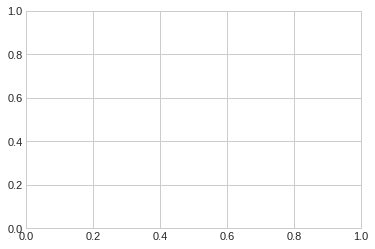

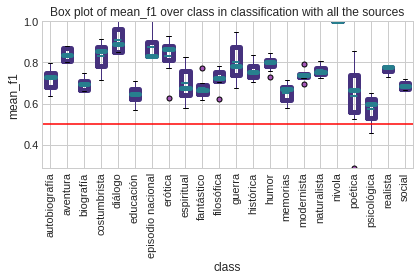

In [22]:
describe_data.boxplots(results_non_bne_text_df, "mean_f1", "class", outdir, "classification with all the sources", rotation = 90, figsize=[7,5],baseline=0.5,)


## Comparison

In [23]:
results_first_edition_df.groupby(["class"]).head(10)["mean_f1"].mean()

0.652046875

In [25]:
results_non_bne_text_df.groupby(["class"]).head(10)["mean_f1"].mean()

0.7553920454545454

In [27]:
results_first_edition_df.groupby(["class"]).head(10)["mean_f1"].std()

0.32415631295437486

In [26]:
results_non_bne_text_df.groupby(["class"]).head(10)["mean_f1"].std()

0.11585276243981006

In [108]:
stats.ttest_ind(results_first_edition_df["mean_f1"], results_non_bne_text_df["mean_f1"], equal_var=False)

Ttest_indResult(statistic=-2.4932554192542655, pvalue=0.015062660483216)

# 5.2.3. Association between Author and First Edition Labe

Getting information about labels and author's name.

In [15]:
author_semantic_labels_df = semantic_labels_df.copy()
author_semantic_labels_df["author.name"] = original_metadata_df["author.name"]

In [16]:
author_semantic_labels_df.head()

,subgenre.cligs,genre.subtitle,subgenre.lithist.MdLE,subgenre.lithist.HdLE,subgenre.edit.epublibre,subgenre.edit.amazon,subgenre.edit.wikidata,subgenre.edit.esdbpedia,subgenre.subtitle.bne,subgenre.subtitle.first.edition,author.name
ne0001,"naturalista,sentimental,social,realista",,,,"aventura,drama","ficción, literatura;ficción, literatura;litera...",,,,,Baroja
ne0002,"naturalista,social,realista",,de tesis,,realista,"ficción, literatura,biblioteca,juvenil-infanti...",,,,,Galdos
ne0003,"naturalista,social,espiritual,realista",,espiritual,,drama,"ficción,europea,antología;ficción, literatura;...",,,,,Galdos
ne0004,"sentimental,social,espiritual,realista",,espiritual,,"drama,realista","siglo-xix,clásico;ficción, literatura;antología;",,,,,Galdos
ne0005,"naturalista,realista,sentimental,social,espiri...",,espiritual,,realista,"ficción, literatura,ficción, literatura;ficció...",,realista,,,Galdos


Contigency table of author's name and most frequent labels

In [17]:
crosstab_df = pd.crosstab(author_semantic_labels_df["author.name"], author_semantic_labels_df['subgenre.subtitle.first.edition'])[["historia","memorias","episodio nacional","costumbrista","escena","humor"]]

In [18]:
crosstab_df

subgenre.subtitle.first.edition,historia,memorias,episodio nacional,costumbrista,escena,humor
author.name,,,,,,
AEspina,0,0,0,0,0,0
AMachado,0,0,0,0,0,0
Alarcon,0,0,0,0,0,0
Aparicio,0,0,0,0,0,0
Arconada,0,0,0,0,0,0
Arderius,0,0,0,0,0,1
Aub,0,0,0,0,0,0
Azana,0,0,0,0,0,0
Azorin,1,0,0,0,0,0


In [19]:
crosstab_df = crosstab_df.append(crosstab_df.sum().rename(index="totals"))

In [20]:
crosstab_df["totals"] = crosstab_df.sum(axis=1)

In [21]:
crosstab_df[(crosstab_df.T != 0).any()]

subgenre.subtitle.first.edition,historia,memorias,episodio nacional,costumbrista,escena,humor,totals
author.name,,,,,,,
Arderius,0,0,0,0,0,1,1
Azorin,1,0,0,0,0,0,1
Baroja,0,5,0,0,0,0,5
Bazan,2,0,0,0,0,0,2
Galdos,4,0,9,0,0,1,14
Jarnes,0,0,0,0,1,0,1
Lorca,1,0,0,0,0,0,1
Miro,0,0,0,0,3,0,3
Unamuno,1,0,0,0,0,0,1


Chi-square test of author's name and label on first cover

In [22]:
stats.chi2_contingency(pd.crosstab(author_semantic_labels_df["author.name"], author_semantic_labels_df["subgenre.subtitle.first.edition"]))[1]


1.234437352042313e-42

In [23]:
author_semantic_labels_df.head()

,subgenre.cligs,genre.subtitle,subgenre.lithist.MdLE,subgenre.lithist.HdLE,subgenre.edit.epublibre,subgenre.edit.amazon,subgenre.edit.wikidata,subgenre.edit.esdbpedia,subgenre.subtitle.bne,subgenre.subtitle.first.edition,author.name
ne0001,"naturalista,sentimental,social,realista",,,,"aventura,drama","ficción, literatura;ficción, literatura;litera...",,,,,Baroja
ne0002,"naturalista,social,realista",,de tesis,,realista,"ficción, literatura,biblioteca,juvenil-infanti...",,,,,Galdos
ne0003,"naturalista,social,espiritual,realista",,espiritual,,drama,"ficción,europea,antología;ficción, literatura;...",,,,,Galdos
ne0004,"sentimental,social,espiritual,realista",,espiritual,,"drama,realista","siglo-xix,clásico;ficción, literatura;antología;",,,,,Galdos
ne0005,"naturalista,realista,sentimental,social,espiri...",,espiritual,,realista,"ficción, literatura,ficción, literatura;ficció...",,realista,,,Galdos


Loop over source to test them all against author's name

In [26]:
results_lt = []
for source in ['subgenre.cligs', 'subgenre.lithist.MdLE', 'subgenre.lithist.HdLE', 'subgenre.edit.epublibre', "subgenre.edit.wikidata", "subgenre.edit.esdbpedia","subgenre.subtitle.bne", 'subgenre.edit.amazon', 'subgenre.subtitle.first.edition']:
    results = stats.chi2_contingency(pd.crosstab(author_semantic_labels_df["author.name"], author_semantic_labels_df[source]))
    print(source, results[1])
    results_lt.append([source, results[1]])
results_df = pd.DataFrame([source_value[1] for source_value in results_lt], columns=["chi2-p-value"],index=[source_value[0] for source_value in results_lt]).sort_values(by="chi2-p-value")
results_df.shape

subgenre.cligs 1.1022574811694338e-09
subgenre.lithist.MdLE 5.694140610319913e-67
subgenre.lithist.HdLE 0.9999994170501526
subgenre.edit.epublibre 1.0
subgenre.edit.wikidata 0.889854058673918
subgenre.edit.esdbpedia 0.9968466081741907
subgenre.subtitle.bne 2.847821949848804e-16
subgenre.edit.amazon 1.0
subgenre.subtitle.first.edition 1.234437352042313e-42


(9, 1)

In [27]:
results_df.round(3)

,chi2-p-value
subgenre.lithist.MdLE,0.000
subgenre.subtitle.first.edition,0.000
subgenre.subtitle.bne,0.000
subgenre.cligs,0.000
subgenre.edit.wikidata,0.890
subgenre.edit.esdbpedia,0.997
subgenre.lithist.HdLE,1.000
subgenre.edit.epublibre,1.000
subgenre.edit.amazon,1.000


In [30]:
results_df

,chi2-p-value
subgenre.lithist.MdLE,5.694141e-67
subgenre.subtitle.first.edition,1.234437e-42
subgenre.subtitle.bne,2.847822e-16
subgenre.cligs,1.102257e-09
subgenre.edit.wikidata,8.898541e-01
subgenre.edit.esdbpedia,9.968466e-01
subgenre.lithist.HdLE,9.999994e-01
subgenre.edit.epublibre,1.000000e+00
subgenre.edit.amazon,1.000000e+00


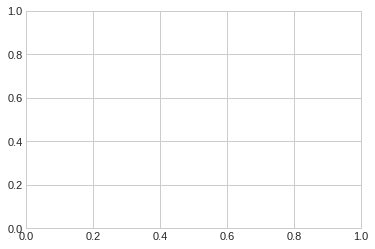

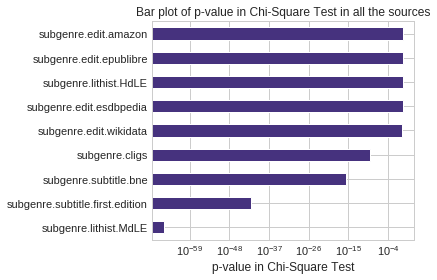

In [29]:
describe_data.simple_bars(results_df.T, "p-value in Chi-Square Test", outdir, "all the sources", logx=True)

#  Further analysis
Classifying data with external metadata. This is not contained in the text of the thesis, because the chi-square test is more meaningful.

In [73]:
from shutil import copyfile
copyfile("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/metadata_recategorized.csv", outdir+"metadata_recategorized.csv")

'/home/jose/Dropbox/Doktorarbeit/ne_data/chap5_2_1/metadata_recategorized.csv'

In [ ]:
recat_metadata_df =  pd.read_csv(outdir + "metadata_recategorized.csv", sep="\t",index_col=0).fillna("")
recat_metadata_df.shape


In [ ]:
recoded_recat_metadata_df = classify.label_encoder(recat_metadata_df[metadata_features_lt])
recoded_recat_metadata_df.shape

In [ ]:
extern_metadata_features_lt = ['year','decade','litHist.pages','litHist.literaryQuality',
                        'author.litHist.pages','authorText.relation','author.name',"author.date.birth","author.date.death", "author.gender"]

In [ ]:
metadata_results_df = classify.classify(wdir = outdir, freq_table  = recoded_recat_metadata_df,
                            metadata = binary_metadata_df,
              classes = subgenres+["ficción-literaria"], verbose = True,
              methods = ["DT","RF","DT","RF"],#, 
              max_MFFs = [30],  minimal_value_samples = 2,
              text_representations = ["raw"],
              typographies = [True], sampling_mode = "cross", make_relative = False, 
                            under_sample_method = "lpc", sampling_times = 10, outdir_results = outdir)


In [122]:
for source in ['subgenre.cligs', 'subgenre.lithist.MdLE', 'subgenre.lithist.HdLE', 'subgenre.edit.epublibre', 'subgenre.edit.amazon', 'subgenre.subtitle.first.edition']:
    results = stats.chi2_contingency(pd.crosstab(metadata_df["author.name"], metadata_df[source]))
    print(source, results[1])

subgenre.cligs 19381.077634259123 1.1022574811693137e-09
subgenre.lithist.MdLE 7164.857100465439 1.5991996137056326e-45
subgenre.lithist.HdLE 1992.5761106683162 0.9999999979889602
subgenre.edit.epublibre 1922.2785316388158 1.0
subgenre.edit.amazon 9129.014211582322 1.0
subgenre.subtitle.first.edition 4010.595804118667 6.969659392349048e-23


In [82]:
recat_metadata_df =  pd.read_csv("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/metadata_recategorized.csv", sep="\t",index_col=0)
recat_metadata_df.shape

(358, 183)

In [80]:
recat_metadata_df

,idno,author.name,title,year,supergenre,genre,subgenre.cligs.important,author.country,author.viaf,author.bne,...,author.movement_ordinal,author.submovement_ordinal,authorText.relation_ordinal,litHist.brow_ordinal,setting.type_ordinal,time.period_ordinal,protagonist.age_ordinal,protagonist.socLevel_ordinal,end_ordinal,representation_ordinal
ne0001,ne0001,Baroja,Mayorazgo,1903,narrative,novela,realist,Spain,36912891.0,XX842743,...,1,4,0,NaN,1,3,3,2,4,2
ne0002,ne0002,Galdos,Misericordia,1889,narrative,novela,realist,Spain,71395987.0,XX1014802,...,0,0,0,NaN,3,3,2,0,0,2
ne0003,ne0003,Galdos,Nazarin,1895,narrative,novela,realist,Spain,71395987.0,XX1014802,...,0,0,0,0.0,-,3,2,0,4,2
ne0004,ne0004,Galdos,Halma,1895,narrative,novela,realist,Spain,71395987.0,XX1014802,...,0,0,0,NaN,3,3,2,2,4,2
ne0005,ne0005,Galdos,Tristana,1892,narrative,novela,bildungsroman,Spain,71395987.0,XX1014802,...,0,0,0,NaN,3,3,1,0,3,2
ne0006,ne0006,Galdos,Angel,1891,narrative,novela,bildungsroman,Spain,71395987.0,XX1014802,...,0,0,0,NaN,2,3,1,1,0,2
ne0007,ne0007,Sawa,MujerMundo,1885,narrative,novela,erotic,Spain,59126336.0,XX1137561,...,1,2,0,NaN,3,3,3,2,0,2
ne0008,ne0008,Zamacois,Enferma,1896,narrative,novela,erotic,Spain,51728159.0,XX1137688,...,1,4,1,NaN,3,3,2,1,0,2
ne0009,ne0009,Galdos,Desheredada,1881,narrative,novela,bildungsroman,Spain,71395987.0,XX1014802,...,0,0,0,NaN,3,3,1,0,0,2
ne0010,ne0010,Aparicio,Vicario,1905,narrative,novela,philosophical,Spain,4959739.0,XX950311,...,1,4,1,NaN,1,3,2,1,0,2


In [84]:
quantied_metadata_df

,idno,author.name,title,year,supergenre,genre,subgenre.cligs.important,author.country,author.viaf,author.bne,...,costumbrista,social,espiritual,realista,autobiografía,psicológica,modernista,biografía,educación,filosófica
ne0001,ne0001,Baroja,Mayorazgo,1903,narrative,novela,realist,Spain,36912891.0,XX842743,...,0,1,0,1,0,0,0,0,0,0
ne0002,ne0002,Galdos,Misericordia,1889,narrative,novela,realist,Spain,71395987.0,XX1014802,...,0,1,0,2,0,0,0,0,0,0
ne0003,ne0003,Galdos,Nazarin,1895,narrative,novela,realist,Spain,71395987.0,XX1014802,...,0,1,2,1,0,0,0,0,0,0
ne0004,ne0004,Galdos,Halma,1895,narrative,novela,realist,Spain,71395987.0,XX1014802,...,0,1,2,2,0,0,0,0,0,0
ne0005,ne0005,Galdos,Tristana,1892,narrative,novela,bildungsroman,Spain,71395987.0,XX1014802,...,0,1,2,3,0,0,0,0,1,0
ne0006,ne0006,Galdos,Angel,1891,narrative,novela,bildungsroman,Spain,71395987.0,XX1014802,...,0,1,2,2,0,0,0,0,1,0
ne0007,ne0007,Sawa,MujerMundo,1885,narrative,novela,erotic,Spain,59126336.0,XX1137561,...,0,1,0,1,0,0,0,0,0,0
ne0008,ne0008,Zamacois,Enferma,1896,narrative,novela,erotic,Spain,51728159.0,XX1137688,...,0,1,0,1,0,0,0,0,0,0
ne0009,ne0009,Galdos,Desheredada,1881,narrative,novela,bildungsroman,Spain,71395987.0,XX1014802,...,0,1,0,2,0,0,0,0,1,0
ne0010,ne0010,Aparicio,Vicario,1905,narrative,novela,philosophical,Spain,4959739.0,XX950311,...,0,1,0,0,0,0,0,0,0,1


In [124]:
author_metadata_features_lt = ['author.litHist.pages','authorText.relation','author.name',"author.date.birth","author.date.death"]

In [125]:
results_metadata_first_edition_df = classify.classify(wdir = outdir, freq_table  = quantied_metadata_df[metadata_features_lt],
            metadata = metadata_labels_quantified_first_edition_df,
              classes = list_labels_lt, verbose = True,
              methods = ["DT","RF"],#, 
              max_MFFs = [30],  minimal_value_samples = 3,
              text_representations = ["raw"],
              typographies = [True], sampling_mode = "cross", make_relative = False, 
                            under_sample_method = "lpc", sampling_times = 10, outdir_results = outdir)


cut_raw_features                narrator protagonist.gender setting.type protagonist.age  \
ne0001    homodiegetic               male        rural          mature   
ne0002  heterodiegetic             female     big-city           adult   
ne0003    homodiegetic               male        mixed           adult   
ne0004    homodiegetic              mixed     big-city           adult   
ne0005  heterodiegetic             female     big-city           young   

       protagonist.socLevel protagonist.profession representation  \
ne0001                 high                   lord      realistic   
ne0002                  low                 beggar      realistic   
ne0003                  low              religious      realistic   
ne0004                 high                   lord      realistic   
ne0005                  low              housewife      realistic   

       setting.continent setting.country setting.settlement        ...         \
ne0001            Europe           Spain 

(358,)
(358, 7)
undersampling lpc
undersampled (16,) (16, 7) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7)
undersampling lpc
undersampled (16,) (16, 7) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7)
undersampling lpc
undersampled (16,) (16, 7) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7)
undersampling lpc
undersampled (16,) (16, 7) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7)
undersampling lpc
undersampled (16,) (16, 7) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7)
undersampling lpc
undersampled (16,) (16, 7) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7)
undersampling lpc
undersampled (16,) (16, 7) lpc
cross validation sampling of  costumbrista
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.944946699845733, pvalue=5.2783640140106865e-23)
Class: 	 costumbrista
Scores:
 	 f1      0.875
rec     0.875
prec    0.875
dtype: float64
p-value:  0.0
Baseline: 		

(358,)
(358, 7)
undersampling lpc
undersampled (18,) (18, 7) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 7)
undersampling lpc
undersampled (18,) (18, 7) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 7)
undersampling lpc
undersampled (18,) (18, 7) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 7)
undersampling lpc
undersampled (18,) (18, 7) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 7)
undersampling lpc
undersampled (18,) (18, 7) lpc
cross validation sampling of  episodio nacional
(358,)
(358, 7)
undersampling lpc
undersampled (18,) (18, 7) lpc
cross validation sampling of  episodio nacional
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=39.68321045700452, pvalue=2.2235490559919193e-58)
Class: 	 episodio nacional
Scores:
 	 f1      0.963
rec     1.000
prec    0.944
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.46299999999999997


analysed class:	 epopeya
* Culling data
labe

(358,)
(358, 7)
undersampling lpc
undersampled (20,) (20, 7) lpc
cross validation sampling of  historia
(358,)
(358, 7)
undersampling lpc
undersampled (20,) (20, 7) lpc
cross validation sampling of  historia
(358,)
(358, 7)
undersampling lpc
undersampled (20,) (20, 7) lpc
cross validation sampling of  historia
(358,)
(358, 7)
undersampling lpc
undersampled (20,) (20, 7) lpc
cross validation sampling of  historia
(358,)
(358, 7)
undersampling lpc
undersampled (20,) (20, 7) lpc
cross validation sampling of  historia
(358,)
(358, 7)
undersampling lpc
undersampled (20,) (20, 7) lpc
cross validation sampling of  historia
(358,)
(358, 7)
undersampling lpc
undersampled (20,) (20, 7) lpc
cross validation sampling of  historia
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.138093031466056, pvalue=1.395456847279271e-06)
Class: 	 historia
Scores:
 	 f1      0.567
rec     0.700
prec    0.500
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.06699999999999995
method

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.327602935261842, pvalue=6.795113611708434e-14)
Class: 	 larga
Scores:
 	 f1      0.778
rec     1.000
prec    0.667
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.278


analysed class:	 leyenda
* Culling data
labels done
Counter({'0': 356, '1': 2})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['ne0090', 'ne0232']
(358,)
(358, 25)
Counter({'0': 356})
(356, 25) (356,)
Replacing NaNs with 0
Least popupated class value:	  356
Labels shape (356,) 
 Data shape (356, 25)
size after culling data: (356, 25) (356,)
typography  True
textual representation:  raw []
(356, 25)
MFW 30
The three first MFWs:  ['author.date.death', 'year', 'decade']
The three last MFWs:  ['author.litHist.pages', 'setting.settlement.represented.exist', 'litHist.pages']
After culling the class

problematic ids:  ['ne0016']
(358,)
(358, 25)
Counter({'0': 357})
(357, 25) (357,)
Replacing NaNs with 0
Least popupated class value:	  357
Labels shape (357,) 
 Data shape (357, 25)
size after culling data: (357, 25) (357,)
typography  True
textual representation:  raw []
(357, 25)
MFW 30
The three first MFWs:  ['author.date.death', 'year', 'decade']
The three last MFWs:  ['author.litHist.pages', 'setting.settlement.represented.exist', 'litHist.pages']
After culling the class sátira  can't be divided in two groups. This category is going to be ignored
               class  mean_f1  mean_rec  mean_prec  baseline  f1-baseline  \
0           borrador    0.222     0.333      0.167       0.5       -0.278   
1           borrador    0.667     1.000      0.500       0.5        0.167   
2       costumbrista    0.875     0.875      0.875       0.5        0.375   
3       costumbrista    0.750     0.875      0.688       0.5        0.250   
4  episodio nacional    0.963     1.000      0.944      

In [126]:
results_metadata_first_edition_df["mean_f1"].mean()

0.6076874999999999

In [127]:
results_metadata_non_bne_df = classify.classify(wdir = outdir, freq_table  = quantied_metadata_df[metadata_features_lt],
            metadata = metadata_labels_quantified_non_bne_df,
              classes = list_labels_lt, verbose = True,
              methods = ["DT","RF"],#, 
              max_MFFs = [20],  minimal_value_samples = 3,
              text_representations = ["raw"],
              typographies = [True], sampling_mode = "cross", make_relative = False, 
                            under_sample_method = "lpc", sampling_times = 10, outdir_results = outdir)


cut_raw_features                narrator protagonist.gender setting.type protagonist.age  \
ne0001    homodiegetic               male        rural          mature   
ne0002  heterodiegetic             female     big-city           adult   
ne0003    homodiegetic               male        mixed           adult   
ne0004    homodiegetic              mixed     big-city           adult   
ne0005  heterodiegetic             female     big-city           young   

       protagonist.socLevel protagonist.profession representation  \
ne0001                 high                   lord      realistic   
ne0002                  low                 beggar      realistic   
ne0003                  low              religious      realistic   
ne0004                 high                   lord      realistic   
ne0005                  low              housewife      realistic   

       setting.continent setting.country setting.settlement        ...         \
ne0001            Europe           Spain 

(358,)
(358, 7)
undersampling lpc
undersampled (16,) (16, 7) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7)
undersampling lpc
undersampled (16,) (16, 7) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7)
undersampling lpc
undersampled (16,) (16, 7) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7)
undersampling lpc
undersampled (16,) (16, 7) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7)
undersampling lpc
undersampled (16,) (16, 7) lpc
cross validation sampling of  costumbrista
(358,)
(358, 7)
undersampling lpc
undersampled (16,) (16, 7) lpc
cross validation sampling of  costumbrista
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.056887148212697, pvalue=0.0001159590389551366)
Class: 	 costumbrista
Scores:
 	 f1      0.792
rec     0.875
prec    0.750
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
DT
0.29200000000000004
method used:	 RF
(358,)
(358, 7)
undersampling lpc
undersampled (16,) (16, 7) l

(358,)
(358, 7)
undersampling lpc
undersampled (18,) (18, 7) lpc
cross validation sampling of  diálogo
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.431793836339437, pvalue=0.017027430973923317)
Class: 	 diálogo
Scores:
 	 f1      0.519
rec     0.556
prec    0.500
dtype: float64
p-value:  0.017
Baseline: 		 0.5
DT
0.019000000000000017
method used:	 RF
(358,)
(358, 7)
undersampling lpc
undersampled (18,) (18, 7) lpc
cross validation sampling of  diálogo
(358,)
(358, 7)
undersampling lpc
undersampled (18,) (18, 7) lpc
cross validation sampling of  diálogo
(358,)
(358, 7)
undersampling lpc
undersampled (18,) (18, 7) lpc
cross validation sampling of  diálogo
(358,)
(358, 7)
undersampling lpc
undersampled (18,) (18, 7) lpc
cross validation sampling of  diálogo
(358,)
(358, 7)
undersampling lpc
undersampled (18,) (18, 7) lpc
cross validation sampling of  diálogo
(358,)
(358, 7)
undersampling lpc
undersampled (18,) (18, 7) lpc
cross validation sampling of  diá

0.06799999999999995
method used:	 RF
(358,)
(358, 7)
undersampling lpc
undersampled (66,) (66, 7) lpc
cross validation sampling of  espiritual
(358,)
(358, 7)
undersampling lpc
undersampled (66,) (66, 7) lpc
cross validation sampling of  espiritual
(358,)
(358, 7)
undersampling lpc
undersampled (66,) (66, 7) lpc
cross validation sampling of  espiritual
(358,)
(358, 7)
undersampling lpc
undersampled (66,) (66, 7) lpc
cross validation sampling of  espiritual
(358,)
(358, 7)
undersampling lpc
undersampled (66,) (66, 7) lpc
cross validation sampling of  espiritual
(358,)
(358, 7)
undersampling lpc
undersampled (66,) (66, 7) lpc
cross validation sampling of  espiritual
(358,)
(358, 7)
undersampling lpc
undersampled (66,) (66, 7) lpc
cross validation sampling of  espiritual
(358,)
(358, 7)
undersampling lpc
undersampled (66,) (66, 7) lpc
cross validation sampling of  espiritual
(358,)
(358, 7)
undersampling lpc
undersampled (66,) (66, 7) lpc
cross validation sampling of  espiritual
(358,)
(3

(358,)
(358, 7)
undersampling lpc
undersampled (42,) (42, 7) lpc
cross validation sampling of  guerra
(358,)
(358, 7)
undersampling lpc
undersampled (42,) (42, 7) lpc
cross validation sampling of  guerra
(358,)
(358, 7)
undersampling lpc
undersampled (42,) (42, 7) lpc
cross validation sampling of  guerra
(358,)
(358, 7)
undersampling lpc
undersampled (42,) (42, 7) lpc
cross validation sampling of  guerra
(358,)
(358, 7)
undersampling lpc
undersampled (42,) (42, 7) lpc
cross validation sampling of  guerra
(358,)
(358, 7)
undersampling lpc
undersampled (42,) (42, 7) lpc
cross validation sampling of  guerra
(358,)
(358, 7)
undersampling lpc
undersampled (42,) (42, 7) lpc
cross validation sampling of  guerra
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.038125776041939, pvalue=2.7320819645054052e-08)
Class: 	 guerra
Scores:
 	 f1      0.707
rec     0.767
prec    0.717
dtype: float64
p-value:  0.0
Baseline: 		 0.5
RF
0.20699999999999996


analysed class:	 hi

The three first MFWs:  ['author.date.death', 'year', 'decade']
The three last MFWs:  ['author.litHist.pages', 'setting.settlement.represented.exist', 'litHist.pages']
method used:	 DT
(358,)
(358, 7)
undersampling lpc
undersampled (112,) (112, 7) lpc
cross validation sampling of  memorias
(358,)
(358, 7)
undersampling lpc
undersampled (112,) (112, 7) lpc
cross validation sampling of  memorias
(358,)
(358, 7)
undersampling lpc
undersampled (112,) (112, 7) lpc
cross validation sampling of  memorias
(358,)
(358, 7)
undersampling lpc
undersampled (112,) (112, 7) lpc
cross validation sampling of  memorias
(358,)
(358, 7)
undersampling lpc
undersampled (112,) (112, 7) lpc
cross validation sampling of  memorias
(358,)
(358, 7)
undersampling lpc
undersampled (112,) (112, 7) lpc
cross validation sampling of  memorias
(358,)
(358, 7)
undersampling lpc
undersampled (112,) (112, 7) lpc
cross validation sampling of  memorias
(358,)
(358, 7)
undersampling lpc
undersampled (112,) (112, 7) lpc
cross v

(358,)
(358, 7)
undersampling lpc
undersampled (14,) (14, 7) lpc
cross validation sampling of  poética
(358,)
(358, 7)
undersampling lpc
undersampled (14,) (14, 7) lpc
cross validation sampling of  poética
(358,)
(358, 7)
undersampling lpc
undersampled (14,) (14, 7) lpc
cross validation sampling of  poética
(358,)
(358, 7)
undersampling lpc
undersampled (14,) (14, 7) lpc
cross validation sampling of  poética
(358,)
(358, 7)
undersampling lpc
undersampled (14,) (14, 7) lpc
cross validation sampling of  poética
(358,)
(358, 7)
undersampling lpc
undersampled (14,) (14, 7) lpc
cross validation sampling of  poética
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.1757234404679497, pvalue=0.002235020333846992)
Class: 	 poética
Scores:
 	 f1      0.619
rec     0.714
prec    0.571
dtype: float64
p-value:  0.0022
Baseline: 		 0.5
DT
0.119
method used:	 RF
(358,)
(358, 7)
undersampling lpc
undersampled (14,) (14, 7) lpc
cross validation sampling of  poética
(358,)
(

(358,)
(358, 7)
undersampling lpc
undersampled (24,) (24, 7) lpc
cross validation sampling of  regionalista
(358,)
(358, 7)
undersampling lpc
undersampled (24,) (24, 7) lpc
cross validation sampling of  regionalista
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.830582649316426, pvalue=0.00022443539768392796)
Class: 	 regionalista
Scores:
 	 f1      0.617
rec     0.700
prec    0.600
dtype: float64
p-value:  0.0002
Baseline: 		 0.5
DT
0.11699999999999999
method used:	 RF
(358,)
(358, 7)
undersampling lpc
undersampled (24,) (24, 7) lpc
cross validation sampling of  regionalista
(358,)
(358, 7)
undersampling lpc
undersampled (24,) (24, 7) lpc
cross validation sampling of  regionalista
(358,)
(358, 7)
undersampling lpc
undersampled (24,) (24, 7) lpc
cross validation sampling of  regionalista
(358,)
(358, 7)
undersampling lpc
undersampled (24,) (24, 7) lpc
cross validation sampling of  regionalista
(358,)
(358, 7)
undersampling lpc
undersampled (24,) (24, 7) 

(358,)
(358, 7)
undersampling lpc
undersampled (28,) (28, 7) lpc
cross validation sampling of  sátira
(358,)
(358, 7)
undersampling lpc
undersampled (28,) (28, 7) lpc
cross validation sampling of  sátira
(358,)
(358, 7)
undersampling lpc
undersampled (28,) (28, 7) lpc
cross validation sampling of  sátira
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.2623484194157075, pvalue=0.2097890357183374)
Class: 	 sátira
Scores:
 	 f1      0.50
rec     0.55
prec    0.50
dtype: float64
p-value:  0.2098
Baseline: 		 0.5
RF
0.0
          class  mean_f1  mean_rec  mean_prec  baseline  f1-baseline  \
0     biografía    0.709     0.692      0.742       0.5        0.209   
1     biografía    0.720     0.725      0.815       0.5        0.220   
2  costumbrista    0.792     0.875      0.750       0.5        0.292   
3  costumbrista    0.625     0.750      0.562       0.5        0.125   
4        cuento    0.750     1.000      0.625       0.5        0.250   

  classifier_n

In [128]:
results_metadata_non_bne_df["mean_f1"].mean()

0.6580882352941176

In [129]:
stats.ttest_ind(results_metadata_non_bne_df["mean_f1"], results_metadata_first_edition_df["mean_f1"], equal_var=False)

Ttest_indResult(statistic=0.6286278747353061, pvalue=0.5376148567988552)